In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dados_experimentos.csv')

In [4]:
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [8]:
# tabela de frequência para os dados
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [9]:
pd.crosstab(df['dose'], df['droga'])

droga,00199ff52,00251fc41,00321ea80,0034c0847,0060e686f,00898e82c,009a5da05,00d2de1d8,00dba5599,014d175d7,...,ff32d9c31,ff539cce7,ff551f3a3,ff55b75c9,ff5a3ecb1,ff9565933,ffd66e220,ffe357f8f,ffed8e1c9,fff7d208d
dose,,,,,,,,,,,,,,,,,,,,,
D1,3,3,6,3,3,3,3,3,1,4,...,3,3,4,3,3,3,3,1,3,3
D2,3,3,6,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,0,3,3


In [14]:
pd.crosstab([df['dose'],  df['tempo']], df['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [15]:
#retorna as proporções da análise - contraste entre as colunas
pd.crosstab([df['dose'],  df['tempo']], df['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [16]:
#normaização como soma das linhas - contraste entre as linhas
pd.crosstab([df['dose'],  df['tempo']], df['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [17]:
#agrupar pela média de g-0, para o tratamento e dose
pd.crosstab([df['dose'],  df['tempo']], df['tratamento'], values=df['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
#Desafio group by
#Desafio normalizar o crosstab pela coluna
#Desafio explorar a função melt

In [18]:
import seaborn as sns

In [20]:
df[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='g-0', ylabel='g-3'>

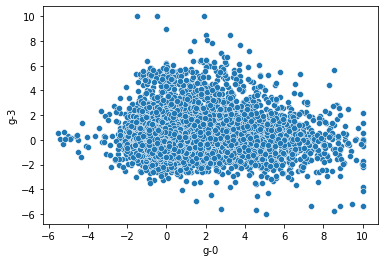

In [19]:
sns.scatterplot(x='g-0', y='g-3', data=df)

<AxesSubplot:xlabel='g-0', ylabel='g-8'>

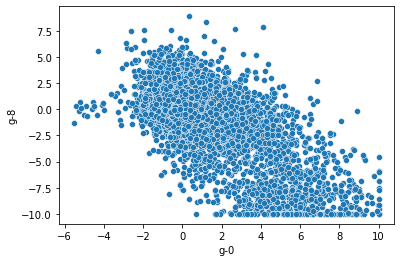

In [21]:
sns.scatterplot(x='g-0', y='g-8', data=df)

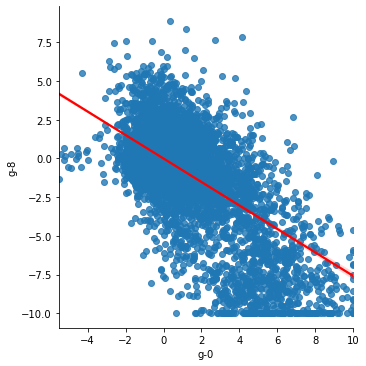

In [23]:
sns.lmplot(x='g-0', y='g-8', data=df, line_kws={'color':'red'})

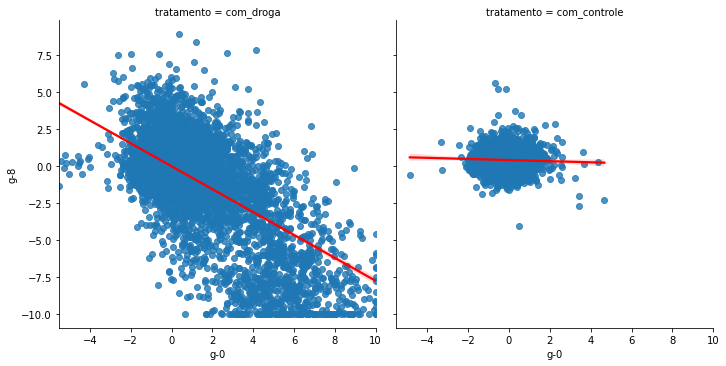

In [26]:
sns.lmplot(x='g-0', y='g-8', data=df, line_kws={'color':'red'}, col='tratamento')

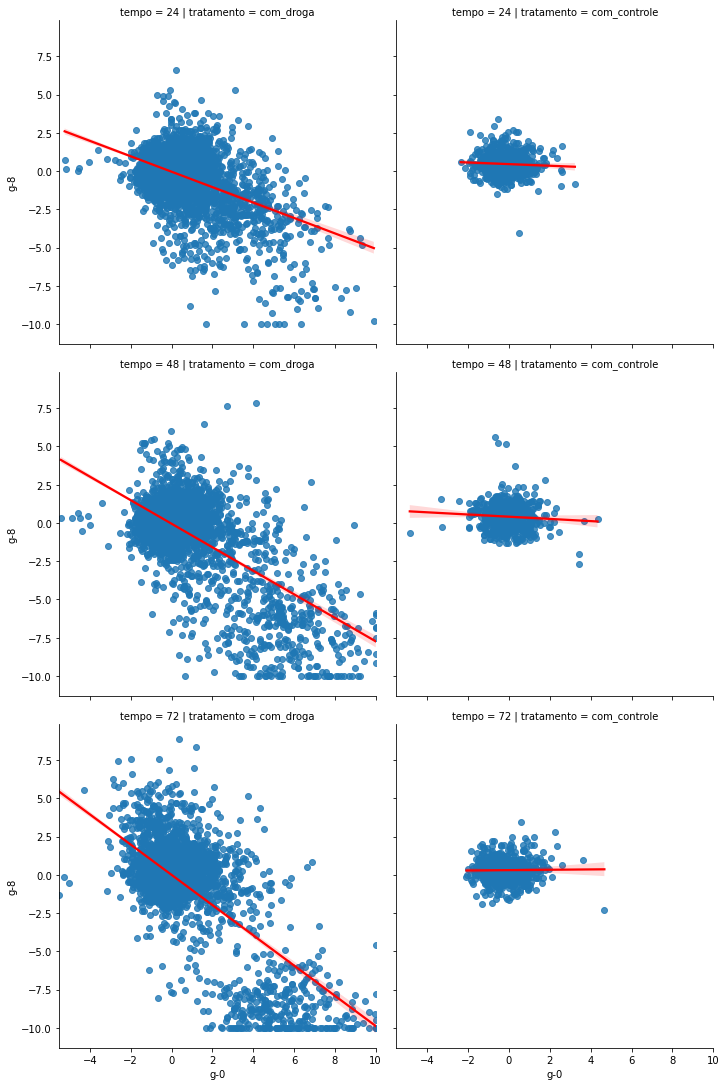

In [25]:
sns.lmplot(x='g-0', y='g-8', data=df, line_kws={'color':'red'}, col='tratamento', row='tempo')

In [30]:
corr = df.loc[:,'g-0':'g-50'].corr()

<AxesSubplot:>

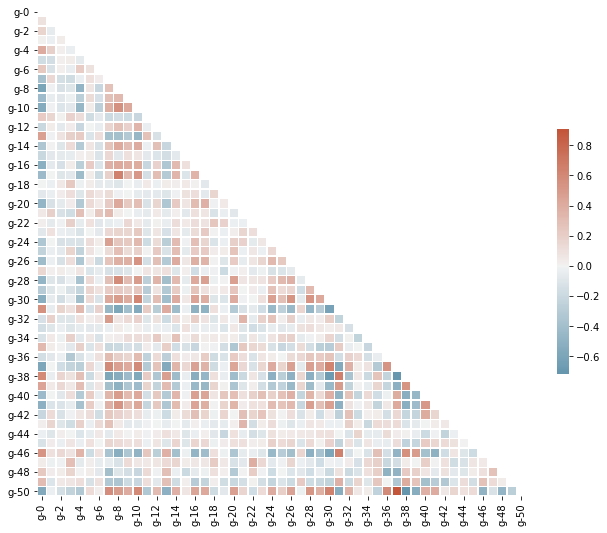

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [35]:
corr_celular = df.loc[:,'c-0':'c-50'].corr()

<AxesSubplot:>

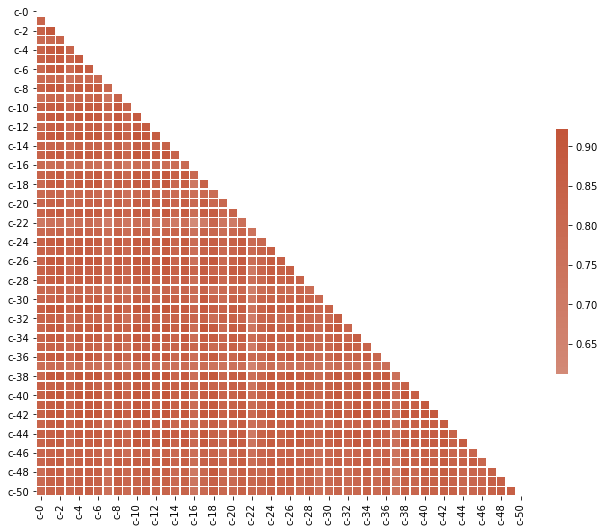

In [36]:
import numpy as np
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})